# Topic 1.1: Geometrical transformations

This notebook combines theory with exercises to support the understanding of geometrical transformations in medical image analysis. Implement all functions in the `code` folder of your cloned repository, and test it in this notebook after implementation by importing your functions to this notebook. Use available markdown sections to fill in your answers to questions as you proceed through the notebook.

**Contents:** <br>

1. [Review of linear algebra](#linalg)<br>


2. [Introduction to medical image registration](#intromir)<br>

   - [Applications of registration](#applications)<br>
   - [Classification of registration methods](#classification)<br>
   - [Causes of medical image misalignment](#misalignment)<br>


3. [Geometrical transformations (theory and exercises)](#geomtrans)<br>

    3.1 [Rigid transformations](#rigtrans)<br>

    3.2 [Nonrigid transformations](#nonrigtrans)<br>

    3.3 [Transform composition](#transcomp)<br>

    3.4 [Homogeneous coordinates](#coordinates)<br>
    
**References:** <br>

[1] Fitzpatrick, J.M., Hill, D.L. and Maurer Jr, C.R., Image registration. [LINK](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)

   - Rigid transformations: [Fitzpatrick, J.M., et al. Image registration, section 8.2.1](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)

   - Non-rigid transformations: [Fitzpatrick, J.M., et al. Image registration, section 8.2.2](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)
    
[2] Kolter, Z. Do, C. Linear algebra review and reference. [LINK](http://cs229.stanford.edu/section/cs229-linalg.pdf)

[3] Maintz JB, Viergever MA. A survey of medical image registration. Med Image Anal. 1998;2(1):1–36. [LINK](https://pubmed.ncbi.nlm.nih.gov/10638851/)

In [2]:
%load_ext autoreload
%autoreload 2

<div id='linalg'></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 1. Review of linear algebra 

For animated explanation of linear algebra, you may refer to many YouTube channels, e.g. [Essence of linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab). It is recommended that you also read [chapters 1-3 of the document by Kolter, Z. Do, C. Linear algebra review and reference](http://cs229.stanford.edu/section/cs229-linalg.pdf).


### Scalars 
A scalar is a single number, and can be represented by integers, real numbers, rational numbers, etc. Scalars are denoted with italic font: *a*, *n*, *t*. 

### Vectors 
In mathematical terms, a vector is a 1-D array of numbers, while in physics terms, a vector is simply an arrow pointing in space, defined by its length and direction. While in physics, vectors do not have a common origin, in linear algebra, they typically start from the root of a coordinate system (e.g. x,y,z). Computer scientists define vectors as ordered lists of numbers. Vectors can be real, binary, integer, etc. An example notation for type and size of real vectors: $\mathbb{R}^n$

<font size="3">
$$
\begin{align}
x &= \begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}
\end{align}
$$
</font>

In Python, we can create a vector of three elements using numpy (np) arrays or the function arange. 

In [3]:
import numpy as np # importing the numpy library

x = np.array([0,1,2]) # arrays are type-set in square brackets
print(f'\nVector x is:\n {x}, it has shape {x.shape}')

y = x.reshape(3,1) # the reshape function takes rows and columns as input arguments
print(f'\nVector y is:\n {y}. It has length of {len(y)} elements, and shape {y.shape}.')



Vector x is:
 [0 1 2], it has shape (3,)

Vector y is:
 [[0]
 [1]
 [2]]. It has length of 3 elements, and shape (3, 1).


### Matrices 
A matrix is a finite-dimensional rectangular array of numbers arranged in rows and columns. Whenever referring to a matrix element, it is common to first list row ($i$) before collumn ($j$) indices. The type and shape of matrix $A$ can be denoted as <font size="3">$\pmb{A} \in \mathbb{R}^{m\,\times\,n}$</font>, where elements are arranged as follows:

<br>
<font size="3">
\begin{align}
\pmb{A} &= \begin{bmatrix}
A_{1,1}\,\,\,\,A_{1,2} \\
A_{2,1}\,\,\,\,A_{2,2}
\end{bmatrix}
\end{align}
</font>

In Python, we can create a matrix using the np.matrix() function, specifying row elements in comma-separated blocks:

In [4]:
M = np.matrix([[1,2],[3,4]])
print("\nMatrix M: \n", M)


Matrix M: 
 [[1 2]
 [3 4]]


### *Matrix (Dot) Product*

There are various operations that are done on matrices. Besides addition and subtraction, these operations can include multiplication by a scalar, a vector or another matrix. Scalar multiplication means that each element of a matrix is multiplied by a scalar. If we multiply an $m \times n$ matrix by a vector, then the output is a linear combination of all columns ($\pmb{C} = \pmb{AB}$, where $\pmb{C}_{i,j} = \sum_{k}\,\pmb{A}_{i,k}\,\pmb{B}_{k,j}$). It is however important to realize that _order matters_, i.e. matrix multiplication is not commutative ($\pmb{AB} \neq \pmb{BA}$). 

In [7]:
# Example of matrix multiplication

A = np.matrix([[1,2,1], [0,2,1]])
B = np.matrix([[1,2,0], [0,3,1], [-2,1,1]])

# Possible multiplication
print("\nMultiplication of A*B: \n", A*B)

# Multiplication is not commutative (you can check the output error by uncommenting the line below)
#print("\nMultiplication of B*A: \n", B*A)



Multiplication of A*B: 
 [[-1  9  3]
 [-2  7  3]]


### *Matrix transpose*

The transpose of a matrix can be thought of as a mirror image across the main diagonal. The first column becomes the first row, the second column becomes the second row, etc. An $n \times m$ matrix is said to be symmetric if $\mathbf{A} = \mathbf{A}^{\top}$, and skew symmetric if $\mathbf{A}^{\top} = - \mathbf{A}$. In other words, <font size="3">$(\pmb{A}^\top)_{i,j} = \pmb{A}_{i,j}$</font>, and <font size="3">$(\pmb{AB})^\top = \pmb{B}^\top\pmb{A}^\top$</font>.

In [8]:
# Matrix transpose is done using the transpose() function 
M = np.matrix([[1,2],
               [3,4]])

print("\nMatrix M: \n", M)
print("\nMatrix M transposed: \n", M.transpose())


Matrix M: 
 [[1 2]
 [3 4]]

Matrix M transposed: 
 [[1 3]
 [2 4]]


### *Identity matrix*

An identity matrix of size $n \times n$ is a square matrix with ones on its main diagonal and all other elements equal to zero, i.e.
<font size="3">
$\forall\pmb{x}\in \mathbb{R}^{n},\pmb{I}_{n}\pmb{x} = \pmb{x}$.<br>
    
$$
\begin{align}
\pmb{I} &= \begin{bmatrix}
1 \,\,\,\, 0 \,\,\,\, 0 \\
0 \,\,\,\, 1 \,\,\,\, 0 \\
0 \,\,\,\, 0 \,\,\,\, 1 
\end{bmatrix}
\end{align}
$$
</font>

In [9]:
# Identity matrix can be created using the eye() or identity () function
N = np.eye(3)
M = np.identity(2, dtype = float) #dtype determines the data type of a variable

print("\nMatrix N with eye(): \n", N)
print("\nMatrix M with identity(): \n", M)


Matrix N with eye(): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matrix M with identity(): 
 [[1. 0.]
 [0. 1.]]


### *Matrix inversion*

A matrix inverse is a matrix which when multiplied by the original matrix will yield an identity matrix. Matrix inverse is denoted as: <font size="3">$\pmb{A}^{-1}\pmb{A} = \pmb{I}_{n}$</font>. However, not all matrices have their inverse form. The inverse of a matrix exists only if the matrix is non-singular ($\det A \neq 0$). A system of equations can be solved using matrix inverse as follows:

<font size="3">
$$
\begin{matrix}
\begin{align}
\pmb{Ax} &= b \\
\pmb{A}^{-1}\pmb{Ax} &= \pmb{A}^{-1}\pmb{b} \\
\pmb{I}_{n}\pmb{x} &= \pmb{A}^{-1}\pmb{b} \\
\end{align}
\end{matrix}
$$
</font>


In [10]:
# Matrix inversion can be calculated using the numpy function linalg.inv():

# Taking a 3 * 3 matrix
A = np.array([[6, 1, 1], [4, -2, 5], [2, 8, 7]])

A_inv =  np.linalg.inv(A)
# Calculating the inverse of the matrix
print("\nThe inverse of matrix A is: \n", A_inv.round(3))


The inverse of matrix A is: 
 [[ 0.176 -0.003 -0.023]
 [ 0.059 -0.131  0.085]
 [-0.118  0.15   0.052]]


### Special matrices and vectors
There is a plethora of special matrices and vectors in linear algebra, the explanation of which is beyond the scope of this notebook. To name a couple of examples, a unit vector is a vector of length 1: <font size="3">$||\pmb{x}||_{2} = 1$</font>; a symmetric matrix is a matrix which is equal to its transposed form: <font size="3">$\pmb{A} = \pmb{A}^\top$</font>; and a square matrix is said to be orthogonal or orthonormal if its transpose is equal to the inverse (<font size="3">$\pmb{A}^{-1} = \pmb{A}^\top$</font>) of that matrix: <font size="3">$\pmb{A}^\top\pmb{A} = \pmb{A}\pmb{A}^\top = \pmb{I}$</font>. 
    

### Systems of equations

Via the so-called augmented matrices, one can solve systems of equations. This process is not vastly different from what you normally do when solving single equations. Augmented matrices contain all equation arguments as rows. The operations on these rows consist of switching two rows, multiplication of a row by a nonzero number, and replacing a row by a multiple of another row added to it. Any row operation can be undone by another inverse row operation. Here, we show an example in Python to solve the following system of equations:

<br>
<font size="3">
$$
\begin{matrix}
\begin{align}
8x + 3y - 2z &= 9 \\
-4x + 7y + 5z &= 15 \\
3x + 4y - 12z &= 35
\end{align}
\end{matrix}
$$
</font>

In [11]:
# Solving systems of equations is easy using the numpy function linalg.solve():

A = np.array([[8, 3, -2], [-4, 7, 5], [3, 4, -12]])
b = np.array([9, 15, 35])
x = np.linalg.solve(A, b)

print("\nSolution for given system of equations [x,y,z] is: \n", x.round(2))


Solution for given system of equations [x,y,z] is: 
 [-0.58  3.23 -1.99]


### Norms

Norms are defined as functions that measure the magnitude of a matrix or vector. E.g. the distance of a vector from its origin is called a Euclidean norm, which can also be defined as the square root of the inner product of a vector with itself. The norm of a matrix expresses the magnitude of that matrix regardless of the number of its elements. Vector norms have the following three properties: 

<br>
<font size="4">
$$
\begin{matrix}
\begin{align}
f(\pmb{x}) &= 0 \Longrightarrow \pmb{x} = 0 \\
f(\pmb{x + y}) &\leq f(\pmb{x}) + f(\pmb{y})\,\,\,\,\text{(triangle inequality)} \\
\forall\alpha \in \mathbb{R}, f(\alpha\pmb{x}) &= |\alpha|f(\pmb{x}) \\
\end{align}
\end{matrix}
$$
</font>


In [15]:
# Norms can be calculated in Python using the numpy function linalg.norm()
# This function returns one of the seven matrix norms 
# or one of the infinite vector norms depending upon the value of its parameters.

# initialize vector
x = np.arange(20)
 
# compute norm of vector
x_norm = np.linalg.norm(x)
 
print("\nVector norm of x is: \n", x_norm.round(2))

norms = 0
for i in x:
    norms += i**2;
    
print(np.sqrt(norms))


Vector norm of x is: 
 49.7
49.69909455915671


### Determinant

Determinant of a matrix is a special number defined only for square matrices, representing the matrix in terms of a real number which can be used to solve systems of linear equations and finding matrix inverse. Determinant of a transformation matrix $\textbf{T}$ is the signed area of a unit square shape after transforming with $\textbf{T}$. The sign reflects whether the orientation has changed or not. The determinant of a $2 \times 2$ matrix is calculated as the subtraction of cross-diagonal element multiplication. It is common to use the absolute value of the determinant: 

$$
\begin{align}
\det\begin{pmatrix} a & b \\ c & d \end{pmatrix} = |ad - bc|
\end{align}
$$

In [ ]:
# The determinant of a matrix can be calculated using the numpy function linalg.det():

M = np.matrix([[1,2],[3,4]])

M_det = abs(np.linalg.det(M))

print("\nDeterminant of matrix M: \n", M_det)


<div id='intromir'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

##  2. Introduction to (medical) image registration

Image registration is the determination of a geometrical transformation that aligns one view of an object with another view of that object or another object. The term "view" refers to a two-, three-dimensional image or the physical representation of an object in space. An example of two-dimensional image types may be x-ray projections captured as a digital radiograph or a light projection in a video frame. Three-dimensional images can be collected by imaging modalities commonly used in hospital settings, e.g. computed tomography (CT) or magnetic resonance (MR) imaging scanners. Generally, images are stored as discrete arrays of intensity values, and in medical applications, the object in each view will represent an anatomical region of interest. Explained mathematically, the inputs of registration are two views, which we map together by matching points positioned in one view to points in another view. 

<div id='applications'></div>

### Applications of registration
Registration may be applied to various purposes. It allows us to combine information from different sources (MR-guided radiotherapy planning) or investigate longitudinal changes in e.g. post-treatment patient monitoring. Moreover, registration procedures are employed when studying group changes across multiple subjects in a trial. Last but not least, registration can aid in segmentation tasks when mapping atlases with anatomical model priors to a newly acquired medical image, or when performing e.g. motion-induced image artefact corrections.

<div id='classification'></div>

### Classification of registration methods
There is a complex categorization of registration methods in the field. The following eight categories have been proposed in relevant literature ([Fitzpatrick, J.M., et al. Image registration, section 8.1.2](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)): image dimensionality, registration basis, geometrical transformation, degree of interaction, optimization procedure, modalities, subject, and object. In medical applications, we typically work with individual two-dimensional slices or three-dimensional image volumes, which may be acquired sequentially over time or as a series of multiple 3D volumes (e.g. diffusion MR images). Registration may be performed via various bases, using either a location in respective views (point-based registration) or intensity similarities (intensity-based registration). Further classification of registration methods can be based on geometrical transformations, i.e. which geometrical manipulation (rigid, affine, nonlinear, etc.) are applied for alignment between two different spaces. Registration can be either automatic or semi-automatic, depending on the amount of human interaction during the registration process. The quality of registration output is estimated continuously during the procedure either as a closed-form solution or iteratively. At last, registration methods are stratified according to the amount of modalities they involve (multi-modal, intra-modal), the subjects involved in a trial (inter-subject, intra-patient, atlas-based), and commonly also the anatomical object of interest (e.g. brain, liver, etc.).

<div id='misalignment'></div>

### Causes of medical image misalignment

There are various reasons for misalignments across multiple images / volumes in a series or two images acquired at different time points. In measurements where patient compliance is crucial, different patient positioning, physiological movements of organs (heartbeat, breathing, cerebrospinal fluid flow), patient motion during image acquisition, and distortions caused by imaging systems (e.g. due to the design of imaging sequences in magnetic resonance imaging) can cause data misalignment. In cases where image acquisition includes interventions (e.g. surgery, chemotherapy, biopsy), users benefit from image registration as well.

An example of how digital subtraction angiography benefits from image registration:

<center width="100%"><img src="../reader/assets/digital_subtraction_angiography.png" width="700"></center>

<div id='geomtrans'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 3. Geometrical transformations (theory and exercises)

In registration operations, each involved view is defined by a coordinate system. As written above, registration is the act of mapping points from space $X$ to space $Y$. A successful registration is achieved when the point $y$ in space $Y$ is approximately equal or completely correspondent to $x^{\prime}$ after a transformation $T$ has been applied to point $x$ in $X$. In the picture below, geometrical transformation $T$ aligns the moving axial brain scan with the fixed one.

<center width="100%"><img src="../reader/assets/fixed_moving.png" width="700"></center>

<div id='rigtrans'></div>

## 3.1 Rigid transformations

Rigid transformations ([Fitzpatrick, J.M., et al. Image registration, section 8.2.1](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)) are geometrical alignments of two objects that preserve distances, the planarity of surfaces and angles between straight lines. The so-called rigid registration problems involve object translation and rotation. 

### Translation 
Translation is arguably the "simplest" geometrical transformation that can be applied to an object. Assuming that the coordinates of a 2D geometric object are stored in the variable $X$ (the first row contains the horizontal coordinates and the second row contains the vertical coordinates), translation of the geometric object can be performed by adding a 2D translation vector $X_{t}$ to every vertex of $X$, as shown in the Python example below.

In [16]:
import numpy as np

# An example of translation in Python:
X = np.matrix([[1,2,3],[1,4,6]])
Xt = [4,5]

X[0,:] = X[0,:] + Xt[0]
X[1,:] = X[1,:] + Xt[1]

print("\nTranslation of the first vector X[0,:]: \n", X[0,:])
print("\nTranslation of the second vector X[1,:]: \n", X[1,:])


Translation of the first vector X[0,:]: 
 [[5 6 7]]

Translation of the second vector X[1,:]: 
 [[ 6  9 11]]


### Rotation
Image rotation is a rigid transformation that requires a rotation angle $\theta$ defining the number of degrees for rotation. Typically, rotation is done about image origin (e.g. $x_{0}, y_{0}$).

In [17]:
# An example of rotation in Python using numpy and scipy:
X = np.matrix([[1,2,3],[1,4,6]])

X_rotated_90 = np.rot90(X)

from scipy.ndimage import rotate
X_rotated_270 = rotate(X, angle = 270, reshape=True)

print("\nRotation by 90 degrees: \n", X_rotated_90)
print("\nRotation by 270 degrees: \n", X_rotated_270)


Rotation by 90 degrees: 
 [[3 6]
 [2 4]
 [1 1]]

Rotation by 270 degrees: 
 [[1 1]
 [4 2]
 [6 3]]


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

<div id='nonrigtrans'></div>

## 3.2 Nonrigid transformations

Nonrigid transformations ([Fitzpatrick, J.M., et al. Image registration, section 8.2.2](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)) are essential in registration operations for interpatient comparisons of rigid anatomies, as well as intrapatient registration of anatomical structures with artifactual distortions induced during image acquisition of nonrigid anatomies (e.g. MRI scans of beating heart). Nonrigid transformations include scaling, where the straightness of lines and the angles between them are preserved (used e.g. to suppress calibration errors in MR scanners), and affine transformations, where the angle between lines may be changed (used e.g. in deskewing a CT image after improper gantry angle recording). Further examples of nonrigid registrations comprise projective, perspective and curved registration methods (see chapters...)


Let us leave translation aside for now and focus on the other, more complex geometrical transformations. The identity, scaling, reflection and shearing transformations (or any combination of these transformations) can be performed by multiplying the matrix of coordinates $X$ with an appropriate transformation matrix $T$. Here is an example of Python code that compute transformation matrices for the identity transformation (which is not really a transformation) and scaling:

### Scaling

Scaling can be performed for example in the following way: `X_scaled = scale(2,3)*X`. To verify this, we can use the provided `test_object()` function in the `registration_util.py` module that returns a test geometrical object in the shape of the letter *F*, and plot the original object and a scaled version of it (the provided `plot_object()` function in the `registration_util.py` module can be used to plot the geometrical object) as follows:

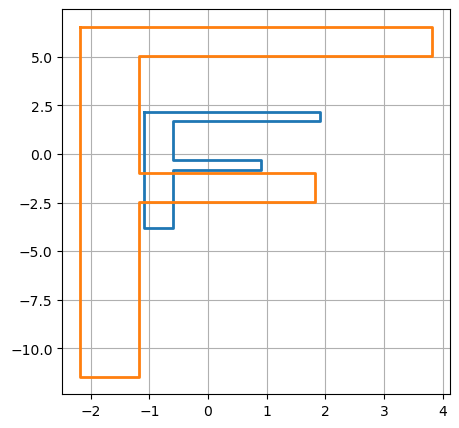

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import registration as reg
import registration_util as util

def identity():
    T = np.eye(2)
    return T

def scale(sx, sy):
    T = np.array([[sx,0],[0,sy]])
    return T

X = util.test_object(1)
X_scaled = reg.scale(2, 3).dot(X)

fig = plt.figure(figsize=(5,5))
ax1  = fig.add_subplot(111)
ax1.grid()
util.plot_object(ax1, X)
util.plot_object(ax1, X_scaled)

### Reflection

Reflection is the mirror transformation of an image along a given axis. 

### Shearing

Shearing transformation (a.k.a transvection) is a type of transformation where each point is displaced by a distance proportional to the perpendicular distance from the point's parallel line. In 3D, planes are sheared instead of points.

In [28]:
# An example of reflection in Python:
X = np.matrix([[1,2,3],[1,4,6]])

X_right_left = np.fliplr(X)
X_upside_down = np.flipud(X)

print(X_right_left)
print(X_upside_down)

[[3 2 1]
 [6 4 1]]
[[1 4 6]
 [1 2 3]]


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.2.1*:
Implement functions that return transformation matrices for 2D rotation, shear and reflection. You can find the templates for these three function definitions in `SECTION 1` of the `registration.py` module. To test your implementation, run the `transforms_test()` script from the `registration_tests.py` module and make sure that the output matches the figure below.

<center width="100%"><img src="../reader/assets/transforms_test.png" width="800"></center>

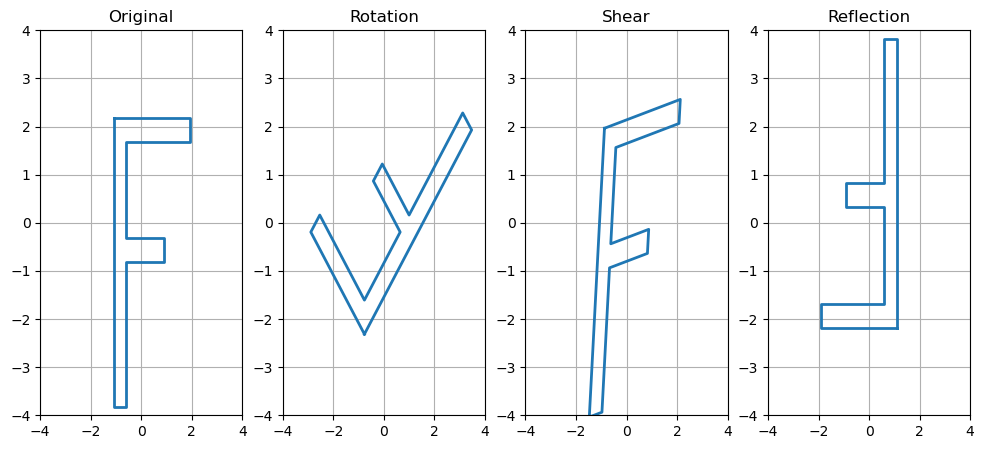

In [32]:
%matplotlib inline
from registration_tests import transforms_test

transforms_test()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.2.1*:
What is rigid and what affine transformation? How many degrees of freedom dothese two types of transformations have in 2D?

Rigid is a tranlation that preserve distances, the planarity of surfaces and angles between straight lines. Affine tranlations may include changing the angles between lines.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.2.2*:
What is the minimum number of corresponding point pairs needed to fit a 2D affine transform? How about 3D? Motivate your answer.

2d: At least four, to make sure there is no rotation scaling or shearing needed. 3D same motivation but a cube so, 8 points.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

<div id='transcomp'></div>

## 3.3 Transform composition

Geometrical transformations can be combined by multiplying transformation matrices. These compositions may involve rotation and translation, or even rotation, scaling, shearing, reflection and translation altogether. For example, the following (conceptual) command first applies a 90° rotation to an object and then a vertical reflection: `X_t = reg.reflect(-1,1).dot(reg.rotate(np.pi/2)).dot(X)`. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.3.1:*
Would the result be different if the two transformations in the example above are applied in reversed order? Motivate your answer.


Yes, the result would be different. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.3.2:*
How can you compute the inverse of an affine transformation represented with a transformation matrix?

Compute the inverse if the transformation matrix.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.3.1*:
Test a few more examples of combining transformations. Save the examples in the `combining_transforms()` script template in the `registration_tests.py` module.

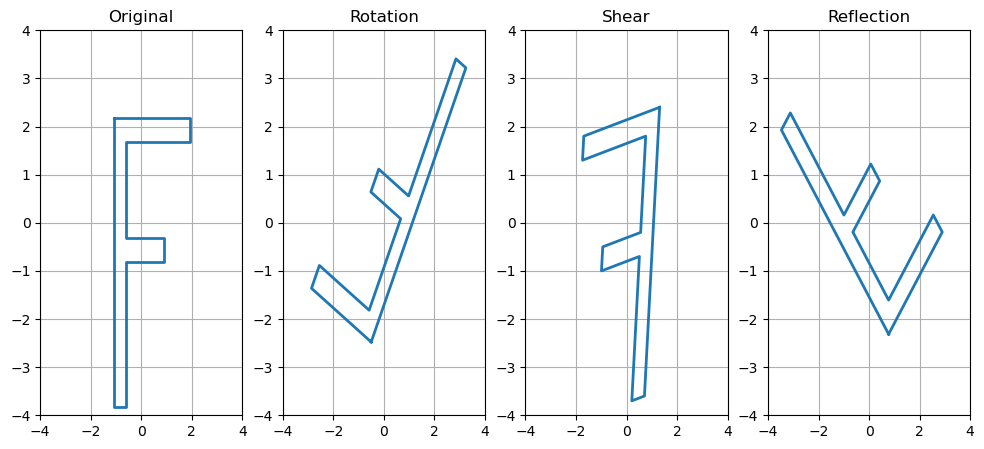

In [36]:
%matplotlib inline
from registration_tests import combining_transforms
combining_transforms()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

<div id='coordinates'></div>

## 3.4 Homogeneous coordinates

As mentioned in the beginning of the previous exercise, translation can be performed by adding a translation vector to the coordinates of an object. Translation can be combined with other geometrical transformations, for example:

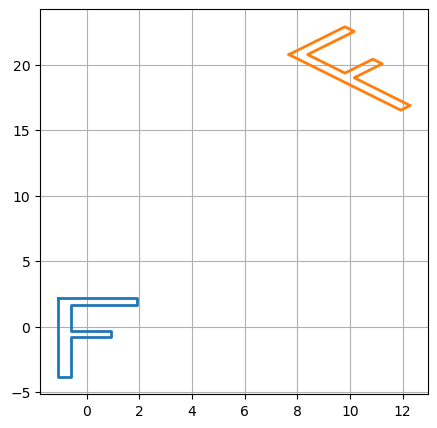

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import registration as reg
import registration_util as util

X = util.test_object(1)

# translation vector
t = np.array([10, 20])

# rotate by 45 deg.
X_rot = reg.rotate(np.pi/4).dot(X)

# translate by 10 in the horizontal and 20 in the vertical direction
X_rot_tran = np.empty(shape=X.shape)
X_rot_tran[0,:] = X_rot[0,:] + t[0];
X_rot_tran[1,:] = X_rot[1,:] + t[1];

fig = plt.figure(figsize=(5,5))
ax1  = fig.add_subplot(111)
ax1.grid()
util.plot_object(ax1, X)
util.plot_object(ax1, X_rot_tran)

However, this way of combining translation with other transformations can be a bit cumbersome (it somewhat complicates the mathematical notation and implementation in code). The transformations that you have implemented in the previous exercise can be straightforwardly combined with translation by converting the transformation matrix to homogeneous form. This matrix can then be applied to the homogeneous coordinates (details can be found in the lecture slides). The function `c2h()` given below (also available in the `registration_util.py` module) implements conversion from Cartesian coordinates to homogeneous coordinates. As you can see from the code, this conversion is performed by simply adding an additional row of coordinates with all ones:

In [38]:
%matplotlib inline
import registration_util as util

X = util.test_object(1)
Xh = util.c2h(X)

print('X:\n{}\n'.format(X))
print('Xh:\n{}\n'.format(Xh))

X:
[[-1.09090909 -1.09090909 -0.59090909 -0.59090909  0.90909091  0.90909091
  -0.59090909 -0.59090909  1.90909091  1.90909091 -1.09090909]
 [ 2.18181818 -3.81818182 -3.81818182 -0.81818182 -0.81818182 -0.31818182
  -0.31818182  1.68181818  1.68181818  2.18181818  2.18181818]]

Xh:
[[-1.09090909 -1.09090909 -0.59090909 -0.59090909  0.90909091  0.90909091
  -0.59090909 -0.59090909  1.90909091  1.90909091 -1.09090909]
 [ 2.18181818 -3.81818182 -3.81818182 -0.81818182 -0.81818182 -0.31818182
  -0.31818182  1.68181818  1.68181818  2.18181818  2.18181818]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.        ]]



<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.4.1*:
Implement the function called `t2h()` in the `registration_util.py` module that converts a transformation matrix and a translation vector to a transformation matrix in homogeneous form. The template for this definition is already provided in the module file. To test your function, verify that the `t2h_test()` script results in the same object as the example above (note that the function `plot_object()` also works with homogeneous coordinates):

[[ 0.70710678 -0.70710678 10.        ]
 [ 0.70710678  0.70710678 20.        ]
 [ 0.          0.          1.        ]]


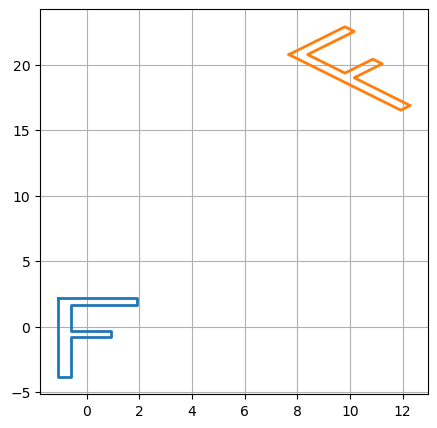

In [5]:
%matplotlib inline
from registration_tests import t2h_test

t2h_test()

In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\20203226\\Documents\\Boeken\\Q1\\8DC00\\code')

The rotation transformation rotates the objects counterclockwise around the origin of the coordinate system. To perform rotation around an arbitrary point, the following sequence of transformations must be applied:

1. Translate the object so the arbitrary rotation point is translated to the origin of the coordinate system
2. Rotate the object
3. Translate the object back so that the arbitrary rotation point is in the original location.

These three transformations can be combined by multiplying the three homogeneous transformation matrices. Combining transformation matrices in homogeneous form works in the same way as the "regular" transformation matrices, i.e. by matrix multiplication. 


# <div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.4.2*:
Write an example that rotates the test object by 45° around the first vertex (hint: the first vertex is `X[:,0]` and `t2h(reg.identity(), Xt)` is a homogeneous transformation matrix that performs only translation). Save the example in the provided `arbitrary_rotation()` template in the `registration_tests.py` module. The result should match the one shown in the figure below.

<center width="100%"><img src="../reader/assets/arbitrary_rotation.png" width="400"></center>


[[ 1.          0.         -1.09090909]
 [ 0.          1.          2.18181818]
 [ 0.          0.          1.        ]]
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[[ 1.          0.          1.09090909]
 [ 0.          1.         -2.18181818]
 [ 0.          0.          1.        ]]
[[ 0.70710678 -0.70710678  1.22325856]
 [ 0.70710678  0.70710678  1.41042897]
 [ 0.          0.          1.        ]]


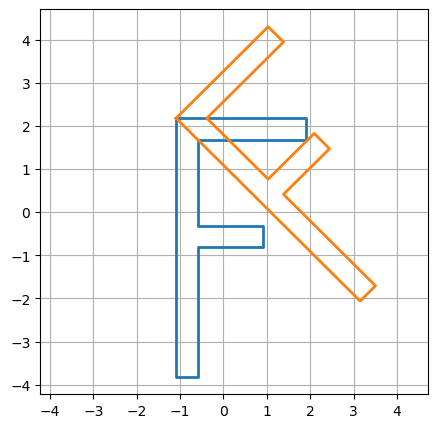

In [7]:
%matplotlib inline

from registration_tests import arbitrary_rotation

arbitrary_rotation()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.4.1:*
Assuming you have implemented the missing functionality correctly, will the following line of code result in an apparent clockwise or counter-clockwise rotation of the image? Motivate your answer. (Hint: think about the coordinate system of the image, also shown in the figures illustrating forward and inverse mapping above.)

```python
It = image_transform(I, t2h(rotate(pi/4), [0 0]))
``` 

Counterclockwise